### Importing libraries

In [10]:
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.applications import VGG16
from sklearn.metrics.pairwise import cosine_similarity
import pickle
import matplotlib.pyplot as plt
from PIL import Image

### Dataset path

In [11]:
dataset_path=r'.\Dataset'

### Parameters 

In [12]:
img_width, img_height = 224, 224  
channels = 3

### Dataset  information

In [13]:
image_extensions = ('.png', '.jpg', '.jpeg', '.webp','gif','avif')

category_counts = {}

for category in os.listdir(dataset_path):
    category_path = os.path.join(dataset_path, category)
    
    if os.path.isdir(category_path):
        image_count = sum(1 for file in os.listdir(category_path) if file.lower().endswith(image_extensions))
        category_counts[category] = image_count

total_images = 0
for category, count in category_counts.items():
    print(f"Category: {category} Images: {count}")
    total_images += count

print(f"Total Images: {total_images}")

Category: bag Images: 959
Category: cup Images: 886
Category: hat Images: 898
Category: lamp Images: 969
Category: Sofa Images: 966
Category: umbrella Images: 955
Category: watch Images: 2977
Category: water bottles Images: 807
Total Images: 9417


### Building Model

In [14]:
base_model = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(img_width, img_height, channels)
    )
base_model.trainable = False

In [15]:
model = Sequential([
    base_model,
    Flatten()
])

In [16]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

### Extract features from an image

In [17]:
def extract_features(img_path, model):
    try:
        img = tf.keras.preprocessing.image.load_img(img_path, target_size=(img_width, img_height))
        img_data = tf.keras.preprocessing.image.img_to_array(img)
        img_data = np.expand_dims(img_data, axis=0)
        img_data = tf.keras.applications.vgg16.preprocess_input(img_data)
        features = model.predict(img_data)
        return features.flatten()
    except Exception as e:
        print(f"Error processing file {img_path}: {e}")
        return None  

### Store extracted features and image paths

In [18]:

features_list = []
relative_image_paths = []

for root, dirs, files in os.walk(dataset_path):
    for img_file in files:
        img_path = os.path.join(root, img_file)
        if img_file.lower().endswith(('.png', '.jpg', '.jpeg', '.webp', '.gif', '.avif')):
            relative_path = os.path.relpath(img_path, dataset_path)
            features = extract_features(img_path, model)
            if features is not None:  
                features_list.append(features)
                relative_image_paths.append(relative_path)

features_array = np.array(features_list)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [19]:
with open('features_list.pkl', 'wb') as f:
    pickle.dump(features_list, f)

with open('image_paths.pkl', 'wb') as f:
    pickle.dump(relative_image_paths, f)

### Find similar images

In [20]:
def find_similar_images(input_img_path, features_array, relative_image_paths, model, top_n=6, threshold=0.30):
    input_features = extract_features(input_img_path, model)
    similarities = cosine_similarity([input_features], features_array)[0]
    top_indices = np.argsort(similarities)[::-1][:top_n]
    top_similarities = similarities[top_indices]
    if top_similarities[0] < threshold:
        print("No similar image found.")
        return []
    return [(relative_image_paths[i], similarities[i]) for i in top_indices]

### Function to display the similar images


In [21]:
def show_similar_images(similar_images, dataset_path):
    if not similar_images:
        print("No images to display.")
        return
    plt.figure(figsize=(15, 10))
    for i, (rel_path, similarity) in enumerate(similar_images):
        img_path = os.path.join(dataset_path, rel_path)  
        img = Image.open(img_path)
        plt.subplot(2, 3, i + 1)
        plt.imshow(img)
        plt.title(f"Similarity: {similarity:.4f}")
        plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


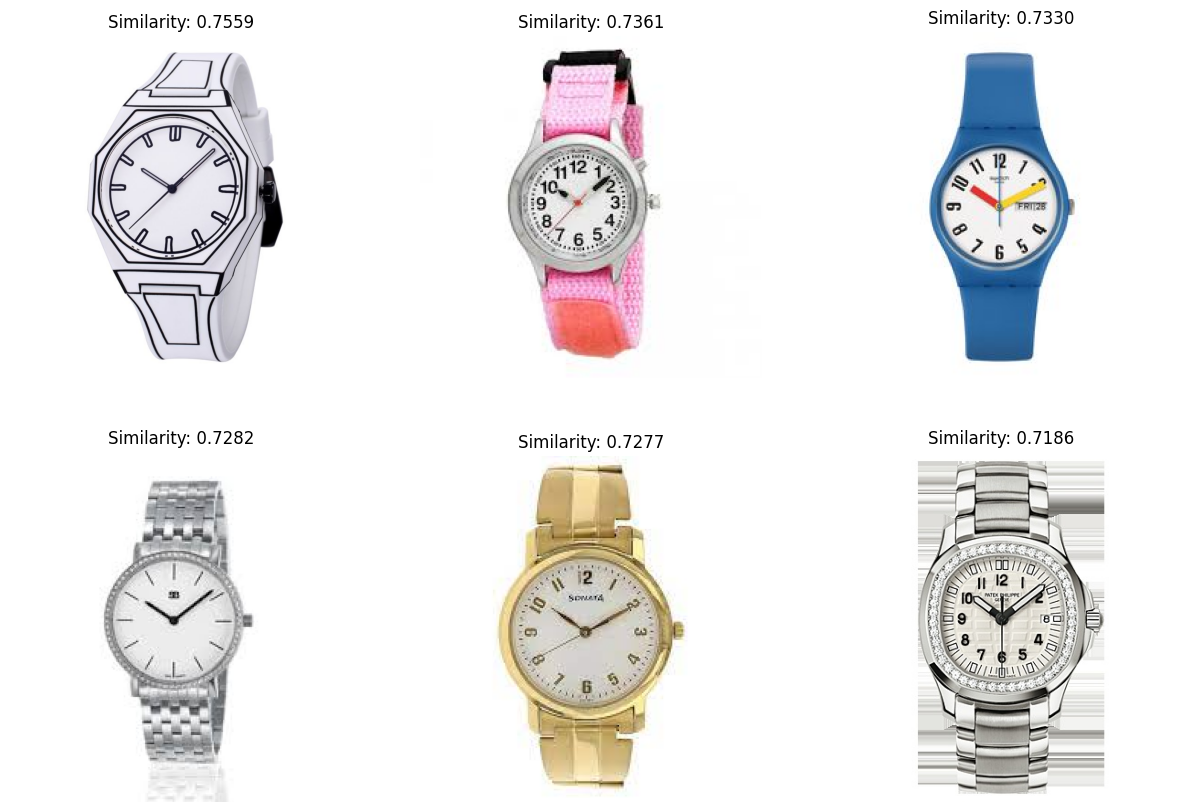

In [29]:
input_image_path = r'F:\2nd mile stone\backend\model\test\images.png'

with open('image_paths.pkl', 'rb') as f:
    relative_image_paths = pickle.load(f)

absolute_image_paths = [os.path.join(dataset_path, rel_path) for rel_path in relative_image_paths]

similar_images = find_similar_images(input_image_path, features_array, relative_image_paths, model, threshold=0.30)
show_similar_images(similar_images, dataset_path)

### Save trained model


In [23]:
model.save('SBIR_model.keras')

### Loading the saved model

In [24]:
model=tf.keras.models.load_model('SBIR_model.keras')